# Projeto 2 - Diabetic_Data - https://www.kaggle.com/datasets/brandao/diabetes?resource=download
# Adriana R M de Souza
# Luiz Gabriel de Souza
# Pablo Ernesto Vigneaux Wilton

### Exploratory Data Analysis - EDA 
#### *Impact of HbA1c Measurement on Hospital Readmission Rates:*
#### *Analysis of 70,000 Clinical Database Patient Records*

Informações:
Os dados do Health Facts que usamos foram um extrato representando
10 anos (1999–2008) de cuidados clínicos em 130 hospitais e
redes de entrega integradas em todos os Estados Unidos:
Centro-Oeste (18 hospitais), Nordeste (58), Sul (28) e Oeste
(16). A maioria dos hospitais (78) tem leitos entre 100 e
499, 38 hospitais têm leitos menores que 100 e leitos de
14 hospitais é maior que 500.

Explicação Básica:

É importante saber se um paciente será readmitido em algum hospital. A razão é que você pode mudar o tratamento, a fim de evitar uma readmissão.

Neste banco de dados, você tem 3 saídas diferentes:

Sem readmissão;
Uma readmissão em menos de 30 dias (esta situação não é boa, porque talvez o seu tratamento não tenha sido adequado);
Uma readmissão em mais de 30 dias (esta não é tão boa quanto a última, porém, o motivo pode ser o estado do paciente.
Nesse contexto, você pode ver diferentes funções objetivo para o problema. Você pode tentar descobrir situações em que o paciente não será readmitido, ou se será readmitido em menos de 30 dias (porque o problema pode atrapalhar o tratamento), etc... Faça sua escolha e vamos ajudá-los a criar novas abordagens para o problema.

Informações sobre o nosso país: [fonte](https://materiais.prorim.org.br/ebook-descobrindo-o-diabetes?gclid=CjwKCAjwy_aUBhACEiwA2IHHQHJNqYTCQ5SVsujMmZ0fEE79xzEGjS3cDIfoj2bgkb-qUIiPqUPztxoC9KQQAvD_BwE)

"O Brasil tem cerca de 15 milhões de pessoas diabéticas. O país está entre os cinco primeiros da América do Sul e Central com os maiores índices de diabéticos entre 20 e 79 anos."

Tipos de diabetes: [fonte](https://diabetes.org.br/)
Tipo 1 - entre 5 e 10% com a doença
Tipo 2 - 90% têm o tipo 2
Gestacional
Pré-diabéticos - obesos/hipertensos

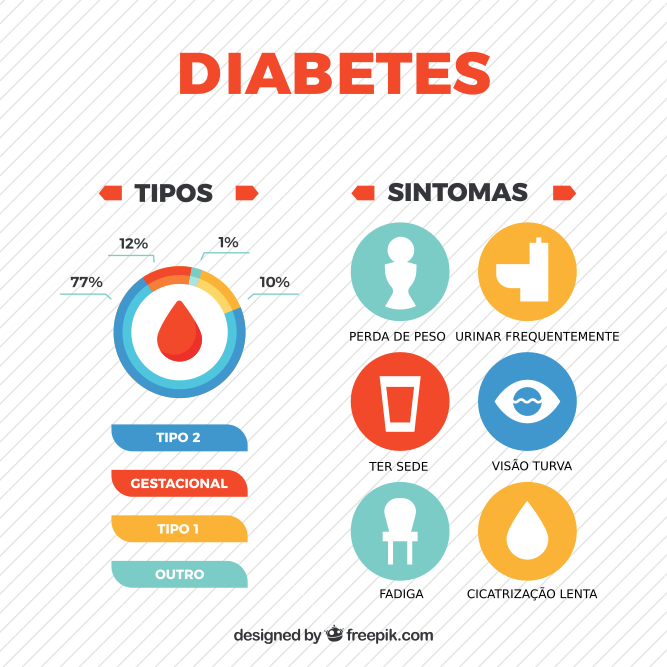

### Importando as bibliotecas

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import category_encoders as ce

### Declarações de Funções

In [133]:
def listar_em_colunas(mylist, columns, sorted=False):
    def slice_list(mylist, cols):
        lines = [mylist[index:index+cols] for index in range(0, len(mylist), cols)]
        return lines

    str_list = mylist.copy()
    if len(str_list):
        if sorted:
            str_list.sort()
        max_len = max(len(text) for text in str_list)
        sliced_list = slice_list(str_list, columns)
        for row in sliced_list:
            print(''.join(text.ljust(max_len + 2) for text in row))
    else:
        print([])        


In [134]:
def carga_de_dados(data_source, sep):
    return pd.read_csv(data_source, sep=sep, encoding='utf-8')

In [135]:
def info_atributos(data):
    atributos_numericos =  data.select_dtypes(include=np.number).columns.values.tolist()
    atributos_categoricos = data.select_dtypes(include='object').columns.values.tolist()
    atributos_categoricos_pos = [data.columns.get_loc(coluna) for coluna in atributos_categoricos ]
    return atributos_numericos, atributos_categoricos, atributos_categoricos_pos

In [136]:
def normalizacao_atributos_numericos(data, atributos):
    dados_normalizados = data.copy()
    # StandardScaler
    scaler = preprocessing.StandardScaler().fit(dados_normalizados[atributos])
    dados_normalizados[atributos] = scaler.transform(dados_normalizados[atributos])
    return dados_normalizados    

In [137]:
def codificacao_atributos_categoricos(data, atributos):
    dados_codificados = data.copy()
    encoder = ce.OrdinalEncoder(cols=atributos, return_df = True)  
    dados_codificados = encoder.fit_transform(dados_codificados)
    return dados_codificados

In [138]:
def relatorio_de_nulos(data):
    quantidade_de_nulos = data.isnull().sum()
    percentual_de_nulos = (data.isnull().mean() * 100).round(3)
    nulos_df = pd.DataFrame({'Nulos': quantidade_de_nulos,
                             'Nulos(%)': percentual_de_nulos})
    nulos_df.sort_values(['Nulos(%)'], ascending=[False], inplace=True)
    nulos_df.head(len(nulos_df))
    return nulos_df


def mapa_de_valores_nulos(data):
    # Usando seaborn
    plt.figure(figsize=(10,15))
    ax = sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    ax.set_title('Mapa de valores Nulos')
    ax.set_ylabel('Indice Registro')
    ax.set_xlabel('Campo')
    plt.show()    


In [139]:
def mostra_percentual_nulos(nulos_df):
    # Usando pandas
    nulos_df['Nulos(%)'].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
    plt.title('Valores Nulos no Dataset')
    plt.ylabel('Atributo')
    plt.xlabel('Percentual de Nulos (%)')

In [140]:
def groupby_contagem(data, atributos):
    local_df = data.groupby(atributos).agg({atributos[1]: [('total', 'count')]}).reset_index()
    local_df.columns = atributos + ['total']
    #local_df.columns = local_df.columns.droplevel()
    return local_df

In [141]:
def plotagem_contagem(data, x, y, hue):
    # Usando Seaborn
    sns.set(rc={'figure.figsize':(15, 10)})
    sns.set(style='white')
    sns.barplot(x=x, 
                y=y, 
                hue=hue, 
                data=data)

In [142]:
def plotagem_matriz_confusao(data, atributos):
    # Usando matplotlib
    figsize = (15, 12)
    corr = data[atributos].corr()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data[atributos].columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data[atributos].columns)
    ax.set_yticklabels(data[atributos].columns)
    plt.show()

In [143]:
def plotagem_distribuicao_retornos(data, x, y, color):
    # Usando plotly.express
    fig = px.violin(data, 
                    y=y, 
                    x=x, 
                    color=color, 
                    box=True,
                    points="outliers",
                    hover_data=data.columns,
                    width=800,
                    height=800)
    fig.update_layout(title_text='Distribuição de Retorno de Pacientes', title_x=0.5)    
    fig.show()

In [144]:
def plotagem_distribuicao(data, x):
    # Usando plotly
    fig = px.histogram(data, 
                       x, 
                       template='none',
                       width=800,
                       height=400)
    fig.update_layout(title_text='Distribuição', title_x=0.5)    
    fig.show()

### Inicio EDA

In [145]:
DATA = './diabetic_data.csv'

In [146]:
#Leitura do Dataset
df_diabetes = carga_de_dados(DATA, ',')
df_diabetes.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [147]:
#Informações do Dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [148]:
# Estatísticas do Dataset
df_diabetes.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [149]:
df_diabetes.median()

/tmp/ipykernel_777799/1640640674.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



encounter_id                152388987.0
patient_nbr                  45505143.0
admission_type_id                   1.0
discharge_disposition_id            1.0
admission_source_id                 7.0
time_in_hospital                    4.0
num_lab_procedures                 44.0
num_procedures                      1.0
num_medications                    15.0
number_outpatient                   0.0
number_emergency                    0.0
number_inpatient                    0.0
number_diagnoses                    8.0
dtype: float64

#### Substituição dos valores '?' por NaN

In [150]:
df_diabetes = df_diabetes.replace('?', np.nan)

#### Identificando Pacientes Duplicados

In [151]:
por_indivduo_df = df_diabetes.drop_duplicates(subset=['patient_nbr'], keep='first').copy()
duplicados_df = df_diabetes[df_diabetes.duplicated('patient_nbr', keep=False)].sort_values('patient_nbr')
duplicados_df.head(6)

encounter_id  patient_nbr             race  gender      age weight  \
4780       26264286          135        Caucasian  Female  [50-60)    NaN   
4267       24437208          135        Caucasian  Female  [50-60)    NaN   
1164        8380170         1152  AfricanAmerican  Female  [50-60)    NaN   
5953       30180318         1152  AfricanAmerican  Female  [50-60)    NaN   
23623      80742510         1152  AfricanAmerican  Female  [60-70)    NaN   
14180      55533660         1152  AfricanAmerican  Female  [60-70)    NaN   

       admission_type_id  discharge_disposition_id  admission_source_id  \
4780                   1                         1                    7   
4267                   2                         1                    1   
1164                   1                         1                    7   
5953                   1                         1                    7   
23623                  1                         1                    7   
14180                  1                         1                    7   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
4780                  3  ...          No      No                   No   
4267                  8  ...          No  Steady                   No   
1164                  6  ...          No  Steady                   No   
5953                  6  ...          No    Down                   No   
23623                 8  ...          No  Steady                   No   
14180                10  ...          No  Steady                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
4780                    No                        No                       No   
4267                    No                        No                       No   
1164                    No                        No                       No   
5953                    No                        No                       No   
23623                   No                        No                       No   
14180                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
4780                       No      Ch         Yes        >30  
4267                       No      Ch         Yes        <30  
1164                       No      No         Yes        >30  
5953                       No      Ch         Yes        >30  
23623                      No      No         Yes        >30  
14180                      No      No         Yes        >30  

[6 rows x 50 columns]

#### Análise de Valores Nulos

In [152]:
nulos_df = relatorio_de_nulos(df_diabetes)
nulos_df = nulos_df[nulos_df['Nulos(%)'] > 0]
nulos_df.head(len(nulos_df.index))

Nulos  Nulos(%)
weight             98569    96.858
medical_specialty  49949    49.082
payer_code         40256    39.557
race                2273     2.234
diag_3              1423     1.398
diag_2               358     0.352
diag_1                21     0.021

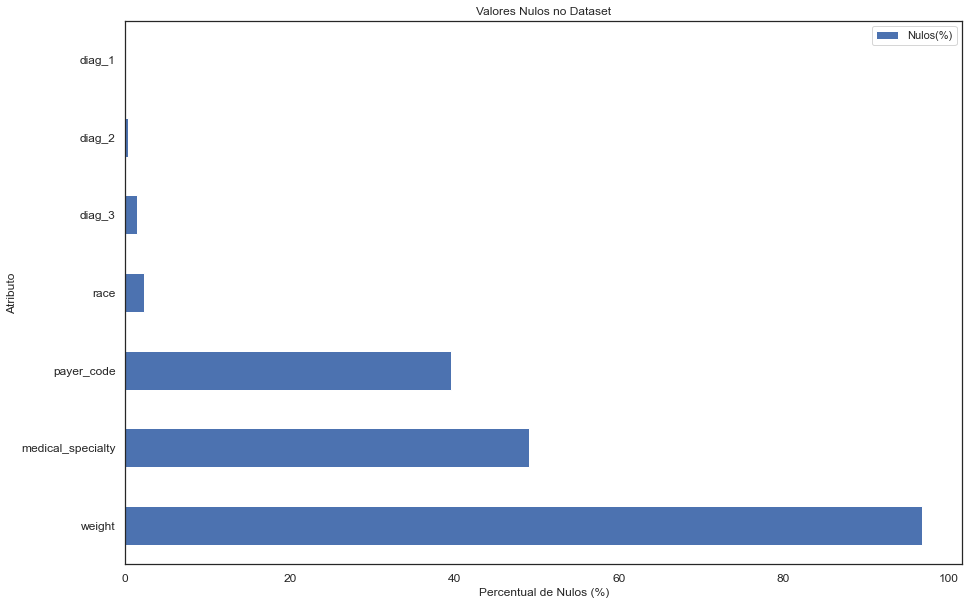

In [153]:
mostra_percentual_nulos(nulos_df)   

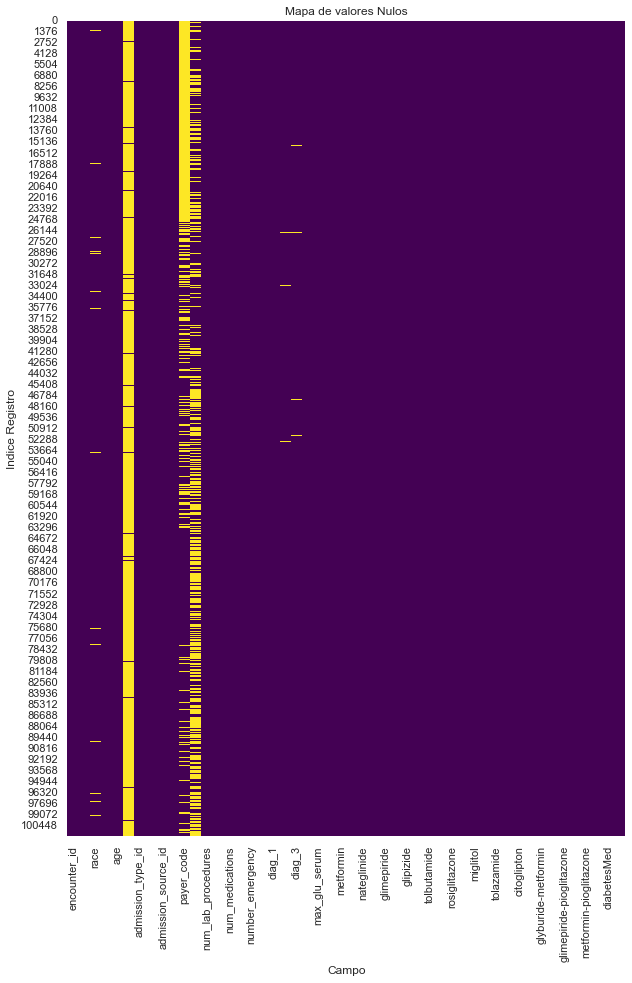

In [154]:
mapa_de_valores_nulos(df_diabetes)

#### Distribuiição das Variáveis (numéricas e string)

In [155]:
atributos_numericos, atributos_string, _ = info_atributos(df_diabetes)
print(f'Atributos Numéricos:')
listar_em_colunas(atributos_numericos, 3)
print('\n')
print(f'Atributos String:')
listar_em_colunas(atributos_string, 3)
print('\n')

Atributos Numéricos:
encounter_id              patient_nbr               admission_type_id         
discharge_disposition_id  admission_source_id       time_in_hospital          
num_lab_procedures        num_procedures            num_medications           
number_outpatient         number_emergency          number_inpatient          
number_diagnoses          


Atributos String:
race                      gender                    age                       
weight                    payer_code                medical_specialty         
diag_1                    diag_2                    diag_3                    
max_glu_serum             A1Cresult                 metformin                 
repaglinide               nateglinide               chlorpropamide            
glimepiride               acetohexamide             glipizide                 
glyburide                 tolbutamide               pioglitazone              
rosiglitazone             acarbose                  miglitol   

In [156]:
por_indivduo_df['race'].fillna('unknow', inplace=True)

In [157]:
por_indivduo_df['race'].unique().tolist()

['Caucasian', 'AfricanAmerican', 'unknow', 'Other', 'Asian', 'Hispanic']

In [158]:
plotagem_distribuicao(por_indivduo_df, 'race')   

### Verifique a distribuição da variável idade (age) - histograma

<AxesSubplot:xlabel='age', ylabel='count'>

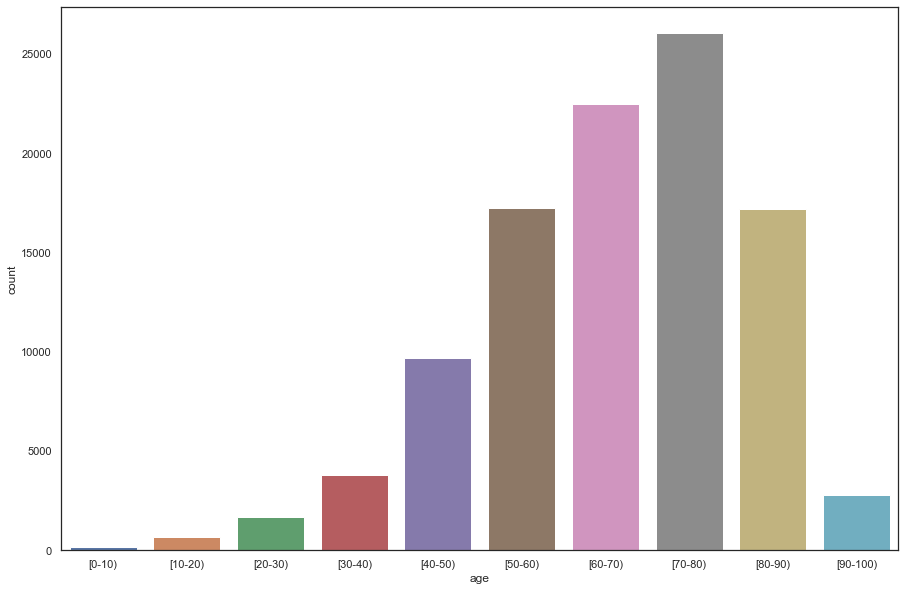

In [159]:
sns.countplot(x='age', data=df_diabetes)

#### Quantidade de Registros por Raça x Gênero

In [160]:
contagem_df = groupby_contagem(por_indivduo_df, ['race', 'gender'])
contagem_df.head(len(contagem_df.index))

race           gender  total
0   AfricanAmerican           Female   7829
1   AfricanAmerican             Male   5058
2             Asian           Female    249
3             Asian             Male    248
4         Caucasian           Female  27565
5         Caucasian             Male  25926
6          Hispanic           Female    812
7          Hispanic             Male    705
8             Other           Female    589
9             Other             Male    588
10            Other  Unknown/Invalid      1
11           unknow           Female    981
12           unknow             Male    965
13           unknow  Unknown/Invalid      2

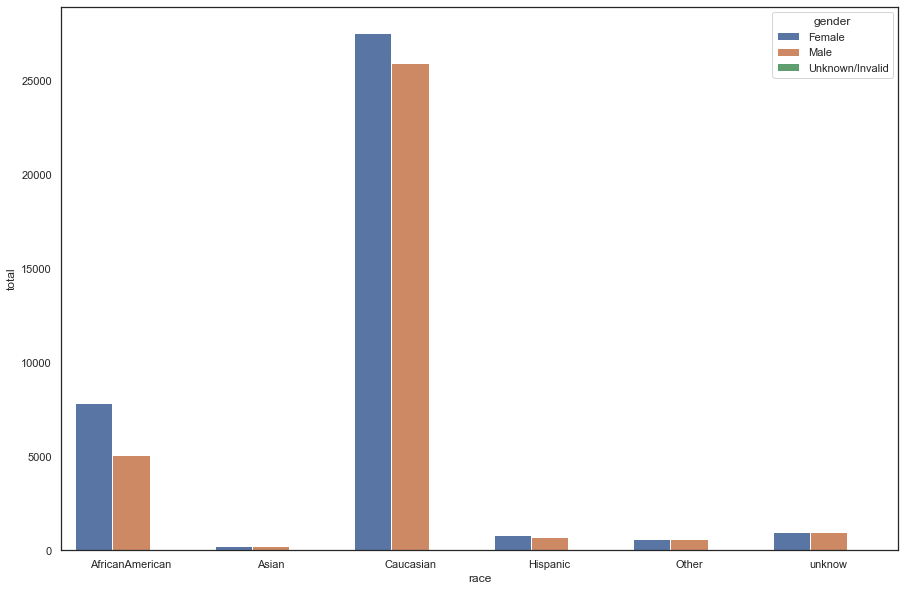

In [161]:
plotagem_contagem(data=contagem_df, x='race', y='total', hue='gender')  

#### Distribuição por Gênero

In [162]:
patient_distinct_g = df_diabetes[['patient_nbr', 'gender']].drop_duplicates()

df_bar_g = patient_distinct_g.pivot_table(index='gender', values='patient_nbr', aggfunc='count').sort_values(by="patient_nbr", ascending=False)

fig = px.bar(df_bar_g)
fig.update_layout(
    xaxis_title="Gênero",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': 'Distribuição de pessoas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_layout(showlegend=False)
fig.show()
#df["race"].value_counts()

#### Distribuição de Registros por Raça x Idade

In [163]:
contagem_df = groupby_contagem(por_indivduo_df, ['race', 'age'])
contagem_df.head(len(contagem_df.index))

race       age  total
0   AfricanAmerican    [0-10)     16
1   AfricanAmerican   [10-20)    155
2   AfricanAmerican   [20-30)    373
3   AfricanAmerican   [30-40)    835
4   AfricanAmerican   [40-50)   1874
5   AfricanAmerican   [50-60)   2903
6   AfricanAmerican   [60-70)   2827
7   AfricanAmerican   [70-80)   2491
8   AfricanAmerican   [80-90)   1176
9   AfricanAmerican  [90-100)    237
10            Asian    [0-10)      2
11            Asian   [10-20)      2
12            Asian   [20-30)      6
13            Asian   [30-40)     12
14            Asian   [40-50)     43
15            Asian   [50-60)     92
16            Asian   [60-70)    120
17            Asian   [70-80)    142
18            Asian   [80-90)     68
19            Asian  [90-100)     10
20        Caucasian    [0-10)    129
21        Caucasian   [10-20)    340
22        Caucasian   [20-30)    638
23        Caucasian   [30-40)   1577
24        Caucasian   [40-50)   4399
25        Caucasian   [50-60)   8572
26        Caucasian   [60-70)  11909
27        Caucasian   [70-80)  14554
28        Caucasian   [80-90)   9809
29        Caucasian  [90-100)   1564
30         Hispanic    [0-10)      2
31         Hispanic   [10-20)     21
32         Hispanic   [20-30)     53
33         Hispanic   [30-40)    142
34         Hispanic   [40-50)    234
35         Hispanic   [50-60)    321
36         Hispanic   [60-70)    344
37         Hispanic   [70-80)    280
38         Hispanic   [80-90)    109
39         Hispanic  [90-100)     11
40            Other    [0-10)      4
41            Other   [10-20)      8
42            Other   [20-30)     20
43            Other   [30-40)     60
44            Other   [40-50)    131
45            Other   [50-60)    247
46            Other   [60-70)    322
47            Other   [70-80)    255
48            Other   [80-90)    113
49            Other  [90-100)     18
50           unknow    [0-10)      1
51           unknow   [10-20)      9
52           unknow   [20-30)     37
53           unknow   [30-40)     73
54           unknow   [40-50)    197
55           unknow   [50-60)    331
56           unknow   [60-70)    438
57           unknow   [70-80)    488
58           unknow   [80-90)    314
59           unknow  [90-100)     60

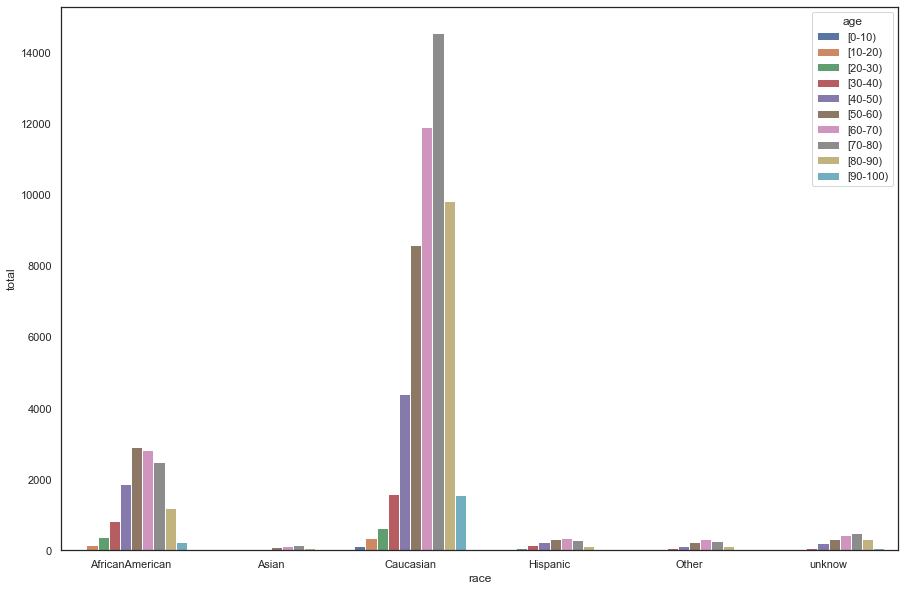

In [164]:
plotagem_contagem(data=contagem_df, x='race', y='total', hue='age')   

### Verifique se há outliers nas variáveis 


<AxesSubplot:xlabel='number_diagnoses', ylabel='age'>

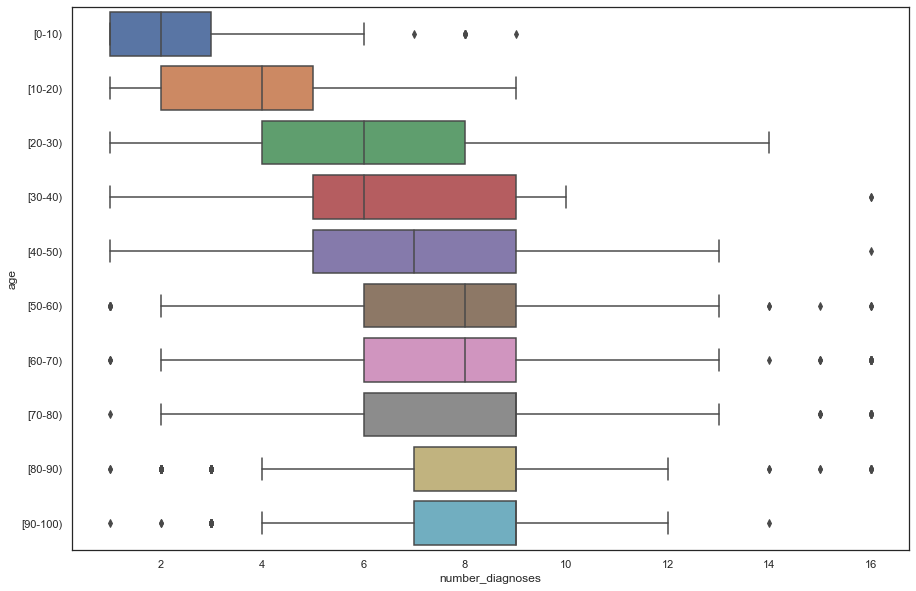

In [165]:
sns.boxplot(x='number_diagnoses', y='age', data=df_diabetes)

#### Distribuição de Registros por Idade x Gênero

In [166]:
contagem_df = groupby_contagem(por_indivduo_df, ['age', 'gender'])
contagem_df.head(len(contagem_df.index))

age           gender  total
0     [0-10)           Female     81
1     [0-10)             Male     73
2    [10-20)           Female    301
3    [10-20)             Male    234
4    [20-30)           Female    730
5    [20-30)             Male    397
6    [30-40)           Female   1563
7    [30-40)             Male   1136
8    [40-50)           Female   3371
9    [40-50)             Male   3507
10   [50-60)           Female   6049
11   [50-60)             Male   6417
12   [60-70)           Female   7777
13   [60-70)             Male   8182
14   [60-70)  Unknown/Invalid      1
15   [70-80)           Female   9757
16   [70-80)             Male   8451
17   [70-80)  Unknown/Invalid      2
18   [80-90)           Female   7061
19   [80-90)             Male   4528
20  [90-100)           Female   1335
21  [90-100)             Male    565

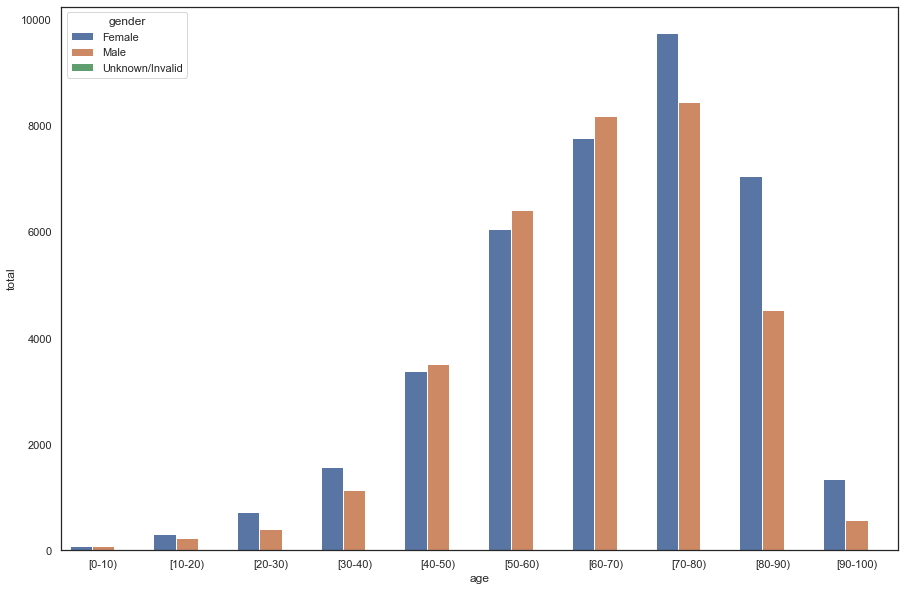

In [167]:
plotagem_contagem(x='age', y='total', hue='gender', data=contagem_df)   

### Gráfico de Dispersão dada a Idade, Número de Diagnósticos e Tempo no Hospital

In [168]:
#gráfico de dispersão dada a idade, número de diagnose e tempo no hospital
df_age = df_diabetes.pivot_table(index = ['number_diagnoses','age'], values = 'time_in_hospital', aggfunc = 'mean').reset_index()
df_age.head()
px.scatter(data_frame=df_age, x='time_in_hospital', y='number_diagnoses', color='age')

/home/pabloernesto/anaconda3/envs/ds_boti/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



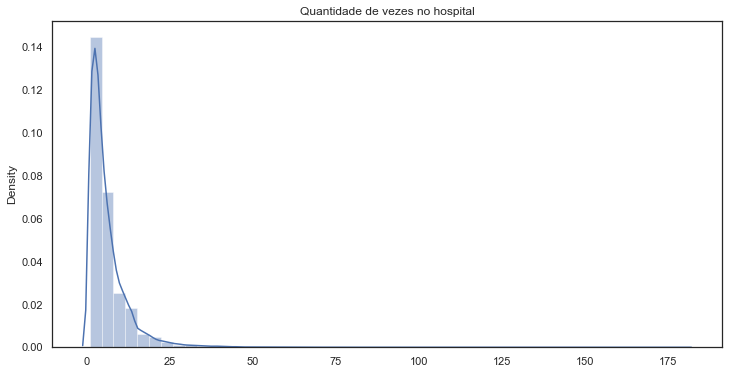

In [169]:
#df["patient_nbr"].unique().value_counts()
df_time_hosp = df_diabetes.pivot_table(index='patient_nbr', values='time_in_hospital', aggfunc='sum')

plt.figure(figsize=(12,6))
ax = sns.distplot(x=df_time_hosp['time_in_hospital'])
ax.set_title('Quantidade de vezes no hospital');

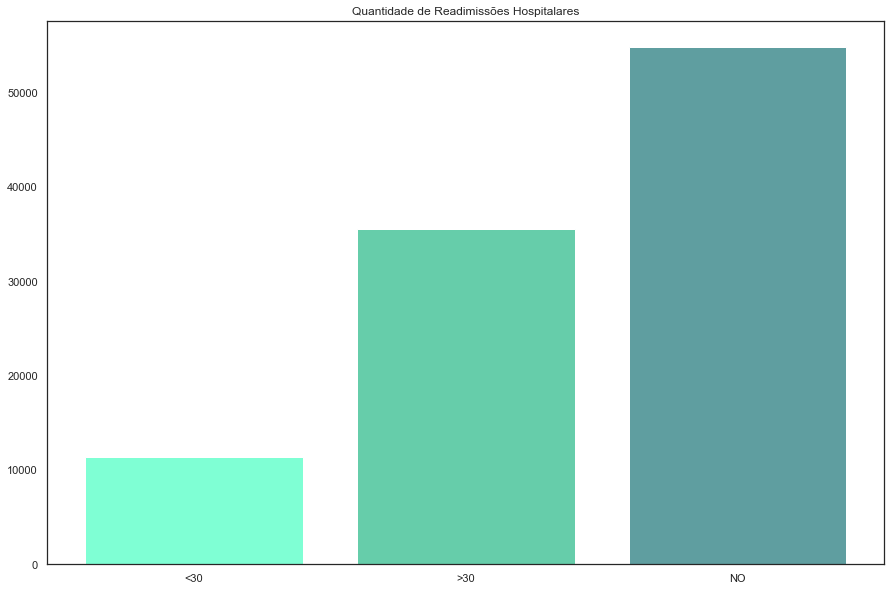

In [170]:
df_bar_readmitted = df_diabetes.pivot_table(index='readmitted', values='encounter_id', aggfunc='count')
df_bar_readmitted

ax = plt.bar(df_bar_readmitted.index, df_bar_readmitted['encounter_id'], color=['#7FFFD4', '#66CDAA', '#5F9EA0'])
plt.title('Quantidade de Readimissões Hospitalares');

Text(0, 0.5, '% Readimissões')

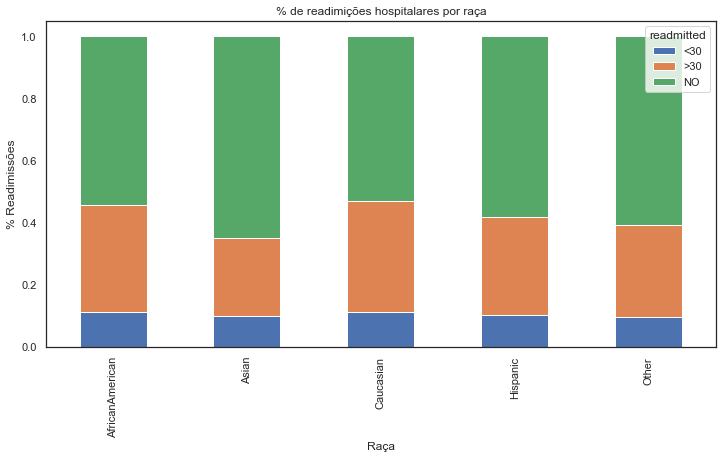

In [171]:
#plt.figure(figsize=(12,6))
df_stacked = df_diabetes.groupby('race')['readmitted'].value_counts(normalize=True).unstack('readmitted')

df_stacked.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("% de readimições hospitalares por raça")
plt.xlabel("Raça")
plt.ylabel("% Readimissões")

In [172]:
contagem_df = groupby_contagem(duplicados_df, ['patient_nbr', 'gender', 'race', 'age'])
contagem_df.head(len(contagem_df.index))

patient_nbr  gender             race      age  total
0              135  Female        Caucasian  [50-60)      2
1             1152  Female  AfricanAmerican  [50-60)      2
2             1152  Female  AfricanAmerican  [60-70)      3
3             1314  Female        Caucasian  [40-50)      3
4             5220    Male        Caucasian  [60-70)      1
...            ...     ...              ...      ...    ...
18243    188238020  Female        Caucasian  [80-90)      2
18244    188284883  Female            Other  [80-90)      2
18245    188634893    Male        Caucasian  [70-80)      2
18246    188970179  Female            Asian  [70-80)      2
18247    189257846    Male            Asian  [60-70)      2

[18248 rows x 5 columns]

In [173]:
plotagem_distribuicao_retornos(contagem_df, x="race", y='total', color='gender')

In [174]:
plotagem_distribuicao_retornos(contagem_df, x="age", y='total', color='gender')

#### Correlação

In [175]:
normalizado_df = codificacao_atributos_categoricos(df_diabetes, atributos_string)

/home/pabloernesto/anaconda3/envs/ds_boti/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.



In [176]:
normalizado_df = normalizacao_atributos_numericos(normalizado_df, normalizado_df.columns.to_list())

In [177]:
normalizado_df.head(10)

encounter_id  patient_nbr      race    gender       age    weight  \
0     -1.587330    -1.191545 -0.437238 -0.927397 -3.824600 -0.147575   
1     -1.608075     0.033564 -0.437238 -0.927397 -3.197277 -0.147575   
2     -1.608901     0.819654  0.647420 -0.927397 -2.569954 -0.147575   
3     -1.604653     0.726480 -0.437238  1.078031 -1.942632 -0.147575   
4     -1.609366    -0.305227 -0.437238  1.078031 -1.315309 -0.147575   
5     -1.609180     0.731521 -0.437238  1.078031 -0.687986 -0.147575   
6     -1.608984     0.773446 -0.437238  1.078031 -0.060664 -0.147575   
7     -1.608907     1.564821 -0.437238  1.078031  0.566659 -0.147575   
8     -1.609406    -0.155044 -0.437238 -0.927397  1.193982 -0.147575   
9     -1.609375     0.238410 -0.437238 -0.927397  1.821305 -0.147575   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           2.750800                  4.031022            -1.169873   
1          -0.708461                 -0.514312             0.306482   
2          -0.708461                 -0.514312             0.306482   
3          -0.708461                 -0.514312             0.306482   
4          -0.708461                 -0.514312             0.306482   
5          -0.016609                 -0.514312            -0.923814   
6           0.675243                 -0.514312            -0.923814   
7          -0.708461                 -0.514312             0.306482   
8          -0.016609                 -0.514312            -0.431695   
9           0.675243                 -0.135535            -0.431695   

   time_in_hospital  ...  citoglipton   insulin  glyburide-metformin  \
0         -1.137649  ...          0.0 -0.966607            -0.081566   
1         -0.467653  ...          0.0 -0.069648            -0.081566   
2         -0.802651  ...          0.0 -0.966607            -0.081566   
3         -0.802651  ...          0.0 -0.069648            -0.081566   
4         -1.137649  ...          0.0  0.827311            -0.081566   
5         -0.467653  ...          0.0  0.827311            -0.081566   
6         -0.132655  ...          0.0  0.827311            -0.081566   
7          0.202343  ...          0.0 -0.966607            -0.081566   
8          2.882327  ...          0.0  0.827311            -0.081566   
9          2.547329  ...          0.0  0.827311            -0.081566   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0            -0.011303                 -0.003135                -0.004433   
1            -0.011303                 -0.003135                -0.004433   
2            -0.011303                 -0.003135                -0.004433   
3            -0.011303                 -0.003135                -0.004433   
4            -0.011303                 -0.003135                -0.004433   
5            -0.011303                 -0.003135                -0.004433   
6            -0.011303                 -0.003135                -0.004433   
7            -0.011303                 -0.003135                -0.004433   
8            -0.011303                 -0.003135                -0.004433   
9            -0.011303                 -0.003135                -0.004433   

   metformin-pioglitazone    change  diabetesMed  readmitted  
0               -0.003135 -0.926591    -1.829868    -0.83688  
1               -0.003135  1.079225     0.546488     0.62497  
2               -0.003135 -0.926591     0.546488    -0.83688  
3               -0.003135  1.079225     0.546488    -0.83688  
4               -0.003135  1.079225     0.546488    -0.83688  
5               -0.003135 -0.926591     0.546488     0.62497  
6               -0.003135  1.079225     0.546488    -0.83688  
7               -0.003135 -0.926591     0.546488     0.62497  
8               -0.003135  1.079225     0.546488    -0.83688  
9               -0.003135  1.079225     0.546488    -0.83688  

[10 rows x 50 columns]

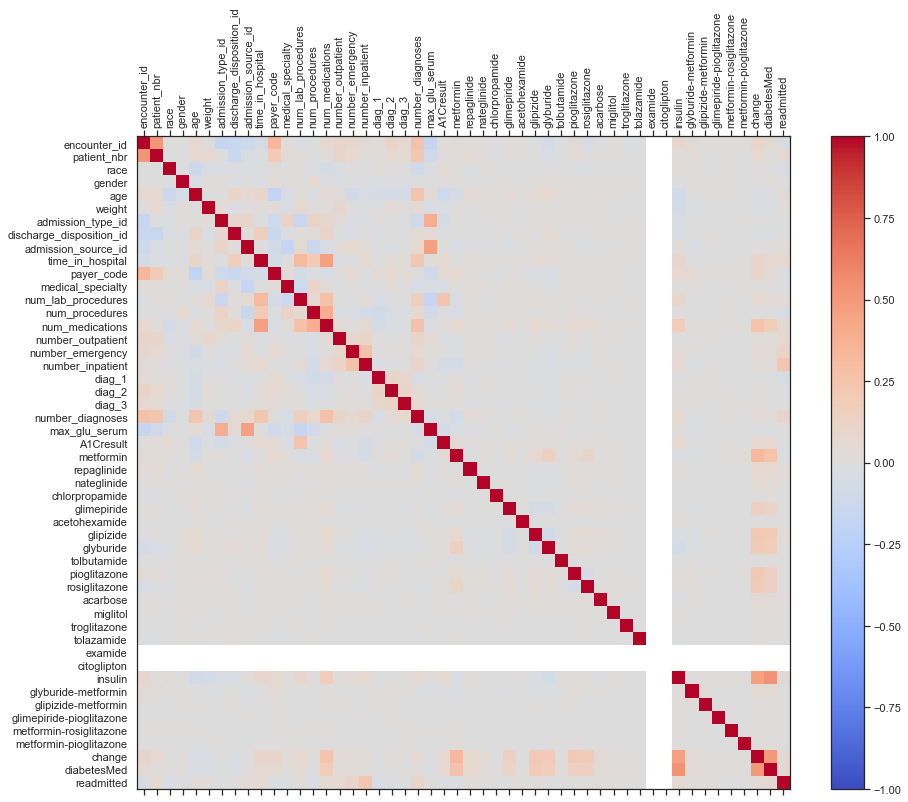

In [178]:
plotagem_matriz_confusao(normalizado_df, normalizado_df.columns.to_list())